In [90]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fpkm_unstr_df_with_labels = pd.read_csv('./Transcriptomics/data/processed_data/fpkm_unstr_data_with_labels.csv')

In [13]:
fpkm_unstr_df_with_labels['Sample Type'].unique()

array(['Primary Tumor', 'Solid Tissue Normal', 'Metastatic',
       'Next Generation Cancer Model', 'Primary Tumor, Primary Tumor',
       'Recurrent Tumor', 'Additional - New Primary',
       'Expanded Next Generation Cancer Model',
       'Primary Tumor, Primary Tumor, Primary Tumor',
       'Solid Tissue Normal, Solid Tissue Normal'], dtype=object)

In [29]:
fpkm_unstr_df_with_labels.columns

Index(['ENSG00000000003.15', 'ENSG00000000005.6', 'ENSG00000000419.13',
       'ENSG00000000457.14', 'ENSG00000000460.17', 'ENSG00000000938.13',
       'ENSG00000000971.16', 'ENSG00000001036.14', 'ENSG00000001084.13',
       'ENSG00000001167.14',
       ...
       'ENSG00000288675.1', 'file_identifier', 'File ID', 'File Name',
       'Data Category', 'Data Type', 'Project ID', 'Case ID', 'Sample ID',
       'Sample Type'],
      dtype='object', length=60669)

In [6]:
gene_cols = fpkm_unstr_df_with_labels.columns.to_numpy()[:60660]

## Use correct TCGA labels

1. CASE ID in gdc_sample_sheet corresponds to case_submitter_id in exposure.tsv file 
2. Use project for labels

In [27]:
exposure_tsv = pd.read_csv('./Transcriptomics/data/clinical.cart.2023-10-29/exposure.tsv', sep='\t')

In [30]:
ge_kidney_cancer_data_with_tgca_labels = pd.merge(fpkm_unstr_df_with_labels,
                                                  exposure_tsv[['case_submitter_id', 'project_id']],
                                                  left_on='Case ID',
                                                  right_on='case_submitter_id')

In [44]:
ge_kidney_cancer_data_with_tgca_labels

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type,case_submitter_id,project_id
0,10.2262,0.3173,27.0503,4.4563,2.3096,5.9078,28.2293,17.0089,7.7371,8.9222,...,12b3d9cf-18af-4930-8d5e-2093f0f82df1,67624292-fd1c-4e48-bd04-aaba940d2c84.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,CPTAC-3,C3L-00966,C3L-00966-03,Primary Tumor,C3L-00966,CPTAC-3
1,26.7812,1.0382,26.0980,4.5692,1.3002,2.1168,9.2201,17.6071,5.0339,8.8061,...,d6714f78-9bb8-4ff7-be93-748889d3e3ec,f07c1a17-8986-4fc0-94e5-aaf2541b097f.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,CPTAC-3,C3L-00966,C3L-00966-07,Solid Tissue Normal,C3L-00966,CPTAC-3
2,7.6194,0.3276,21.9501,1.8377,0.6267,15.6223,14.9608,17.0721,3.2750,4.7548,...,2f9b9698-edc6-4049-809c-9733f05f5c2b,ed920009-6bce-4300-b928-14d0ec474ac6.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-MM-A563,TCGA-MM-A563-01A,Primary Tumor,TCGA-MM-A563,TCGA-KIRC
3,14.3433,0.0286,25.2109,0.6688,0.1627,1.2113,0.2937,30.8673,6.5007,6.7712,...,0a4e4402-13a5-4eea-b70c-b121bcf81156,6abcbd13-ff11-46d6-9ce0-6204a6658c39.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRP,TCGA-GL-8500,TCGA-GL-8500-01A,Primary Tumor,TCGA-GL-8500,TCGA-KIRP
4,15.9625,2.1287,17.7815,1.4285,0.2095,1.7980,4.4779,22.0904,5.1168,4.5242,...,091d9ed1-6127-4b37-b2d5-a463b28e2e9e,c8d14d90-63a8-4576-ae80-ef8582792d16.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRP,TCGA-BQ-5877,TCGA-BQ-5877-11A,Solid Tissue Normal,TCGA-BQ-5877,TCGA-KIRP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,13.2615,1.6089,17.0310,1.7547,0.6150,3.6486,12.9621,18.0895,3.7749,8.2190,...,8c4bd061-8371-4313-bfdc-1b2213daea12,d85f1c60-f3f3-4355-9f31-6c0e5d53360b.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-B8-5165,TCGA-B8-5165-01A,Primary Tumor,TCGA-B8-5165,TCGA-KIRC
1292,7.2172,0.1445,32.0113,1.3530,0.3811,3.7994,13.8595,23.3714,2.3118,7.3030,...,ba209e1e-87f1-47a9-a858-d60953ef4528,28089de8-830d-4774-937f-97d6dd7cfa0a.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-B0-4821,TCGA-B0-4821-01A,Primary Tumor,TCGA-B0-4821,TCGA-KIRC
1293,19.9424,0.2293,18.2269,1.5309,0.4384,3.7295,9.0030,40.2745,6.9462,7.9575,...,4a2da9f0-b75d-466c-b9f0-2e910ee24365,2cf32f8f-0698-453d-a96b-c66a48617d2d.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-AK-3456,TCGA-AK-3456-01A,Primary Tumor,TCGA-AK-3456,TCGA-KIRC
1294,9.4555,0.6331,24.4639,4.4303,2.0087,7.9112,4.9298,22.0748,7.8357,7.7889,...,0d46a5a4-5f09-4373-a3f2-a8a4b6b69c25,bd4ca7de-b046-451a-8a07-722f9b913222.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,CPTAC-3,C3L-01470,C3L-01470-01,Primary Tumor,C3L-01470,CPTAC-3


## Get samples belonging to only 3 labels

Class Labels
- TCGA-KICH
- TCGA-KIRC
- TCGA-KIRP

In [33]:
ge_kidney_cancer_data_with_tgca_labels['project_id'].unique()

array(['CPTAC-3', 'TCGA-KIRC', 'TCGA-KIRP', 'TCGA-KICH', 'HCMI-CMDC',
       'TCGA-SARC'], dtype=object)

In [80]:
ge_kidney_cancer_data_correct_labels = (ge_kidney_cancer_data_with_tgca_labels[ge_kidney_cancer_data_with_tgca_labels['project_id']
                                                                               .isin(
    ['TCGA-KIRC', 'TCGA-KICH', 'TCGA-KIRP']
)]
)

In [76]:
ge_kidney_cancer_data = ge_kidney_cancer_data_correct_labels[
gene_cols
].values
scaled_ge_data = StandardScaler().fit_transform(ge_kidney_cancer_data)

## Questions

1. Is UMap able to distinguish 3 sub types of kidney cancer? 
   1. Is there some parameter tuning that needs to be done 
   2. Is there effect of other covariates ? (Age, sex, medical history)
   3. What are the assumptions of Umap that are not being fulfilled by this dataset?
      1. Is sparse nature of the dataset requiring a different embedding?

## 3. Exploring different embeddings for Kidney data

## 3.1. Plane mapping

In [79]:
plane_mapper = umap.UMAP(random_state=42).fit(scaled_ge_data)

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 0, 'Umap Embedding dim 2')

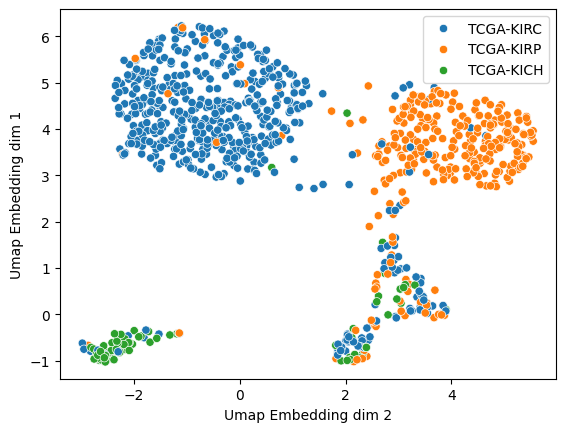

In [83]:
ax = sns.scatterplot(x=plane_mapper.embedding_.T[0], 
                     y=plane_mapper.embedding_.T[1],
                     hue=list( ge_kidney_cancer_data_correct_labels['project_id']))
ax.set_ylabel('Umap Embedding dim 1')
ax.set_xlabel('Umap Embedding dim 2')

## 3.2. Sphere Mapper

In [84]:
sphere_mapper = umap.UMAP(output_metric='haversine', random_state=42).fit(scaled_ge_data)

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [85]:
x = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
y = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
z = np.cos(sphere_mapper.embedding_[:, 0])

/var/folders/ng/bwk7d4ds7wz95l011dbvtc9r0000gn/T/ipykernel_15806/1008950796.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z,


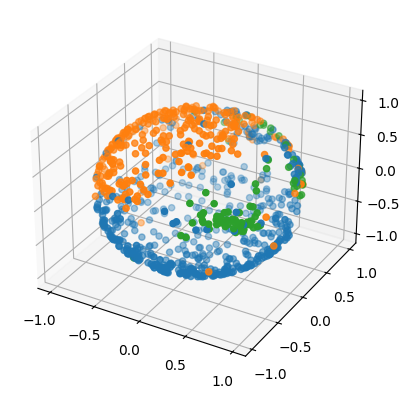

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, 
           c=[sns.color_palette()[x] for x in ge_kidney_cancer_data_correct_labels['project_id'].map(labels_kidney_cancer_dict)], 
           cmap='Spectral')


## 3.3. Hyperboloid mappers

## 

In [88]:
hyperbolic_mapper = umap.UMAP(output_metric='hyperboloid',
                              random_state=42).fit(scaled_ge_data)

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Text(0.5, 0, 'Umap Embedding dim 2')

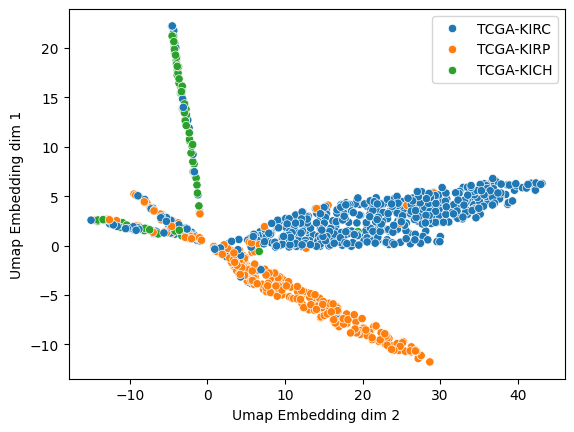

In [89]:
ax = sns.scatterplot(x=hyperbolic_mapper.embedding_.T[0], 
                     y=hyperbolic_mapper.embedding_.T[1],
                     hue=list( ge_kidney_cancer_data_correct_labels['project_id']))
ax.set_ylabel('Umap Embedding dim 1')
ax.set_xlabel('Umap Embedding dim 2')